In [1]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib import ticker, cm
import matplotlib.colors as colors


from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *
from plot_utils import *
configure_plot(plt)

In [2]:
'.asdf'.split('.')

['', 'asdf']

In [3]:
base_folder = '/home/aaj54/group-testing/notebooks/pnas_paper_figs/jun_23_sims/scenario_test_freq_contour_1624564485/'


def get_sim_output_fnames():
    return [base_folder + fname for fname in os.listdir(base_folder)]


def map_fpath_to_params(fpath):
    fname = fpath.split('/')[-1]
    
    # I got the parameter names / labels mixed up when generating the file names, whoops
    
    x_idx = int(fname.split('test_mult_')[1].split('_')[0])
    
    test_mult = float(fname.split('x_axis_point_idx_')[-1].split('.dill')[0])
    
    return test_mult, x_idx


def get_Y_values(test_mult_values):
    return np.array(sorted(list(set(test_mult_values))))

def get_X_values():
    # based on hardcoded values: lb=-1.1, ub = 1.1, npoints=13
    return np.linspace(-1.1, 1.1, 13)


from math import log
def load_contour_plot_data():
    sim_fpaths = get_sim_output_fnames()
    sim_results_df = load_sim_output(sim_fpaths)
    sim_params = {'test_mult': [], 'x_idx': []}
    for fpath in sim_fpaths:
        params = map_fpath_to_params(fpath)
        sim_params['test_mult'].append(params[0])
        sim_params['x_idx'].append(params[1])

    assert(len(set(sim_params['test_mult'])) == len(set(sim_params['x_idx'])) == 13)

    Y = get_Y_values(sim_params['test_mult'])
    X = get_X_values()

    test_mult_to_idx = {y_val:idx for idx, y_val in enumerate(Y)}

    Z = np.zeros((13, 13))

    for sim_idx in range(sim_results_df.shape[0]):

        x_idx = sim_params['x_idx'][sim_idx]
        y_idx = test_mult_to_idx[sim_params['test_mult'][sim_idx]]

        Z[x_idx, y_idx] = (sim_results_df.iloc[sim_idx]['res_cornell_inf_50'])
    
    return X, Y, Z



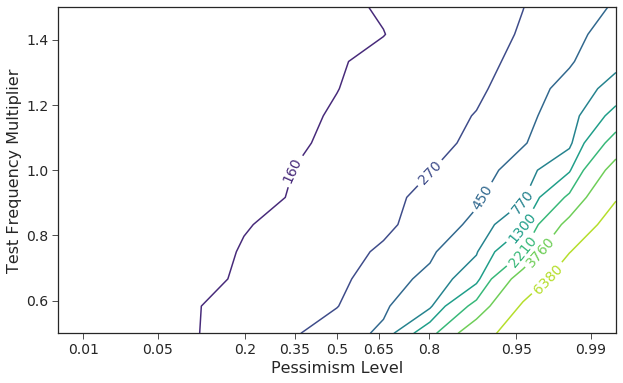

In [4]:
%matplotlib inline

X,Y,Z = load_contour_plot_data()



plt.figure(figsize=(10,6))
plt.ylabel('Test Frequency Multiplier')
plt.xlabel('Pessimism Level')
levels = np.round(np.logspace(log(Z.min())/log(10), log(Z.max())/log(10), num=10), decimals=-1)
CS = plt.contour([norm.ppf(0.99) * x for x in X],Y,Z.T, levels, cmap='viridis', norm=colors.LogNorm())
# CS = plt.contour(X,Y,Z.T, colors=['red'])
plt.clabel(CS, inline=1, fmt='%d', fontsize=14)
plotting_quantiles = [0.01, 0.05, 0.2, 0.35, 0.5, 0.65, 0.8, 0.95, 0.99]
plt.xticks([norm.ppf(x) for x in plotting_quantiles], plotting_quantiles)

# plt.show()
plt.savefig('high_res_figs/fig2/test_freq_scenario_contour.pdf', format='pdf')


In [5]:
X,Y,Z = load_contour_plot_data()
[norm.ppf(0.99) * x for x in X]

[-2.558982661444925,
 -2.132485551204104,
 -1.7059884409632833,
 -1.2794913307224625,
 -0.8529942204816416,
 -0.4264971102408208,
 0.0,
 0.4264971102408208,
 0.8529942204816416,
 1.2794913307224625,
 1.7059884409632833,
 2.1324855512041037,
 2.558982661444925]

In [10]:
X,Y,Z, np.max(Z), np.min(Z), levels

(array([-1.1       , -0.91666667, -0.73333333, -0.55      , -0.36666667,
        -0.18333333,  0.        ,  0.18333333,  0.36666667,  0.55      ,
         0.73333333,  0.91666667,  1.1       ]),
 array([0.5       , 0.58333333, 0.66666667, 0.75      , 0.83333333,
        0.91666667, 1.        , 1.08333333, 1.16666667, 1.25      ,
        1.33333333, 1.41666667, 1.5       ]),
 array([[ 119. ,  115. ,  113.5,  110. ,  108. ,  107. ,  106.5,  103. ,
          101. ,  101. ,   97. ,   99.5,   97. ],
        [ 135.5,  126. ,  127. ,  120.5,  119. ,  111. ,  112.5,  108.5,
          109. ,  109. ,  105. ,  104.5,  101.5],
        [ 149. ,  145. ,  135. ,  129. ,  127. ,  121.5,  121.5,  116. ,
          115.5,  112. ,  113. ,  105.5,  108. ],
        [ 175.5,  157.5,  155. ,  145.5,  150.5,  134. ,  134. ,  131.5,
          127.5,  124. ,  121.5,  122. ,  117.5],
        [ 202. ,  202.5,  179. ,  168.5,  156.5,  150. ,  143. ,  141.5,
          137. ,  136. ,  132. ,  131. ,  128. ],
        

In [13]:
sim_results_df.shape

(169, 28)